## Star wars survey

Here we will analyze the results from a survey made to the public before the release of Star Wars: The force awakens.

Data can be found [**here**](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# reading the data
star_wars_df = pd.read_csv("StarWars.csv", encoding="ISO-8859-1")

In [2]:
star_wars_df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
# First, some cleaning, getting rid of the rows that don't correspond to a real user ID.
star_wars_df = star_wars_df[pd.notnull(star_wars_df["RespondentID"])];

Doing some data exploration, what type of answers are there in the first columns.

In [4]:
star_wars_df["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [5]:
star_wars_df['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

**We will now map "yes" and "no" answers on these columns to True and False statements.**

In [6]:
# Creating a dictionary that will be mapped later
yes_no = {"Yes":True, "No":False}

In [7]:
# applying the mapping
star_wars_df["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no);
star_wars_df['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no);
star_wars_df.head()
# star_wars_df.columns[1].map(yes_no);
# star_wars_df.columns[2].map(yes_no);

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The dictionary method created new columns with the corresponding assigments, but it didn't change the columns on the data frame itself. So I won't use a dictinary here  I'm not sure how to use that with the .loc attribute (it would be neat!). Instead I'll change each column accordingly.

In [8]:
# star_wars_df.loc[pd.isnull(star_wars_df["Do you consider yourself to be a fan of the Star Wars film franchise?"]),"Do you consider yourself to be a fan of the Star Wars film franchise?"] = False 
column2 = "Have you seen any of the 6 films in the Star Wars franchise?"
column3 = "Do you consider yourself to be a fan of the Star Wars film franchise?"
star_wars_df.loc[ (star_wars_df[column2]=="Yes"), column2] = True;
star_wars_df.loc[ (star_wars_df[column2]=="No"), column2] = False;
star_wars_df.loc[ (star_wars_df[column3]=="Yes"), column3] = True;
star_wars_df.loc[ (star_wars_df[column3]=="No"), column3] = False;


In [32]:
# star_wars_df.head()

## Most seen movies

Next 6 columns are answers to boxes that the users checked if they saw the corresponding movie. If the title of the movie is there the person saw the movie, it there is a "NaN" they either didn't reply or didn't see it, we'll assume the latter. 

In [10]:
# We can change the name of the columns with "rename"
star_wars_df = star_wars_df.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1"
})

In [11]:
# also, instead of writing the whole the name of the columns we can call them with the "columns" attribute
star_wars_df = star_wars_df.rename( columns={star_wars_df.columns[4]: "seen_2"})
star_wars_df = star_wars_df.rename( columns={star_wars_df.columns[5]: "seen_3"})
star_wars_df = star_wars_df.rename( columns={star_wars_df.columns[6]: "seen_4"})
star_wars_df = star_wars_df.rename( columns={star_wars_df.columns[7]: "seen_5"})
star_wars_df = star_wars_df.rename( columns={star_wars_df.columns[8]: "seen_6"})

I also want to save the names of the movies on a list, so I can report back on the preferences. Looping over the freshly named "seen_" columns:

In [12]:
movie_names = []
for i in range(1,7):
    col = "seen_"+str(i)
    movie_names.append(star_wars_df[col][pd.notnull(star_wars_df[col])][1])
print(movie_names)

['Star Wars: Episode I  The Phantom Menace', 'Star Wars: Episode II  Attack of the Clones', 'Star Wars: Episode III  Revenge of the Sith', 'Star Wars: Episode IV  A New Hope', 'Star Wars: Episode V The Empire Strikes Back', 'Star Wars: Episode VI Return of the Jedi']


ok, now I will change NaNs to False, and set True if the title of the movie is there, this will make the quantitative analysis easier. The "notnull" and "isnull" functions recognize NaNs.

In [13]:
for i in range(3,9):
    # the notnull transformation has to be done first, otherwise we'll affect the NaN values
    star_wars_df.loc[pd.notnull(star_wars_df[star_wars_df.columns[i]]),star_wars_df.columns[i]] = True 
    star_wars_df.loc[pd.isnull(star_wars_df[star_wars_df.columns[i]]),star_wars_df.columns[i]] = False 

We can count how many people saw each movie, using the "seen_" columns and the ".sum()" attribute, that will treat True as 1, and False as 0.

In [14]:
# How many people watched each movie:
seen_numbers = []
for i in range(1,7):
    col = "seen_"+str(i)
    seen_numbers.append(star_wars_df[col].sum())
    print(movie_names[i-1],seen_numbers[i-1])

Star Wars: Episode I  The Phantom Menace 673
Star Wars: Episode II  Attack of the Clones 571
Star Wars: Episode III  Revenge of the Sith 550
Star Wars: Episode IV  A New Hope 607
Star Wars: Episode V The Empire Strikes Back 758
Star Wars: Episode VI Return of the Jedi 738


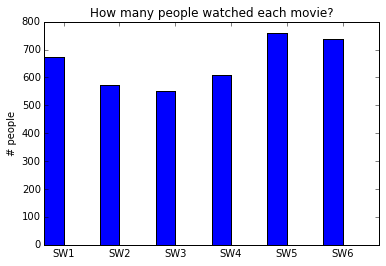

In [15]:
# Better on a bar plot

N = 6
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, seen_numbers, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('# people')
ax.set_title('How many people watched each movie?')
ax.set_xticks(ind + width)
ax.set_xticklabels(('SW1', 'SW2', 'SW3', 'SW4', 'SW5','SW6'))

plt.show()

So, less people watched Episode III (SW3) anyway, would that affect the rating the movie got? I don't think so, because the ranking was taken as the average after ignoring NaNs. The reason for the correlation is that people read the critics before going to see a movie, and if the reviews are bad (as reported before) they will probably skip going to the theater.

## Movies popularity

On the next columns the users rate the movies they like the most and the least. Btw, .ix is the best thing since sliced bread!! to just act on a portion of the df!!

In [16]:
star_wars_df.ix[1:5,9:15]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3


In [17]:
# renaming the colums again:
for i in range(9,15):
    new_name = "ranking_" + str(i-8)
    star_wars_df = star_wars_df.rename( columns={star_wars_df.columns[i]: new_name})
    
# changing the type of data to float
star_wars_df[star_wars_df.columns[9:15]] = star_wars_df[star_wars_df.columns[9:15]].astype(float);

# taking the average of each column
rank_averages = star_wars_df.ix[:,9:15].mean()
for i, j in enumerate(rank_averages):
    print(i, j)

0 3.73293413174
1 4.08732057416
2 4.34131736527
3 3.27272727273
4 2.51315789474
5 3.04784688995


Figuring what movie was most popular, we want to take the smallest of these values since the ranking
is 1 for the best, 6 for the least liked.


In [18]:
mi = [i for i, j in enumerate(rank_averages) if j == min(rank_averages)]
ma = [i for i, j in enumerate(rank_averages) if j == max(rank_averages)]

preferred = movie_names[mi[0]]
least_preferred = movie_names[ma[0]]

print("The preferred movie was:", "'"+preferred+"'")
print("The least preferred movie was:", "'"+least_preferred+"'")

The preferred movie was: 'Star Wars: Episode V The Empire Strikes Back'
The least preferred movie was: 'Star Wars: Episode III  Revenge of the Sith'


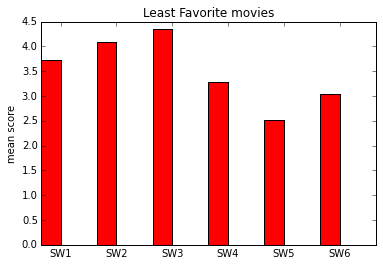

In [19]:

N = 6
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, rank_averages, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('mean score')
ax.set_title('Least Favorite movies')
ax.set_xticks(ind + width)
ax.set_xticklabels(('SW1', 'SW2', 'SW3', 'SW4', 'SW5','SW6'))

plt.show()

This is actually correlated with the number of people that watched each movie. The less liked a particular movie is the (the highest the bar here) the less people went to watch it, people tend to listen to the critics.

The most liked movie is SW5: 'Star Wars: Episode V The Empire Strikes Back' released in 1980, introduces many of the best known characters, like Yoda, and also is the beginning of the romance between Han Solo and Leia starts, and Han gets in a block of carbonite, and ok fine... Leia appears on her iconic swimming suit outfit. So it makes sense!

The least liked movie is 'Star Wars: Episode III  Revenge of the Sith' which is the third one of the second batch of movies. I didn't even watch it untill recently (2016!) and I actually liked it :)

## Fandom analysis
It has been postulated that if a person is a fan of start Treck they won't like Star Wars, let's see about that.

In [20]:
# have to figure out what's the name of the columns first:
star_wars_df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?æ',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
 

In [21]:
sw_fan = 'Do you consider yourself to be a fan of the Star Wars film franchise?'
treck_fan = 'Do you consider yourself to be a fan of the Star Trek franchise?'

star_wars_df[treck_fan].unique()

array(['No', 'Yes', nan], dtype=object)

In [22]:
# converting that to True and False
star_wars_df.loc[ (star_wars_df[treck_fan]=="Yes"), treck_fan] = True;
star_wars_df.loc[ (star_wars_df[treck_fan]=="No"), treck_fan] = False;

len(star_wars_df[treck_fan][pd.isnull(star_wars_df[treck_fan])])

118

In [23]:
star_wars_df[sw_fan].unique()

array([True, nan, False], dtype=object)

In [24]:
len(star_wars_df[sw_fan][pd.isnull(star_wars_df[sw_fan])])

350

I'll ignore the NaNs for now... then maybe try put them to False... 

In [25]:
SW1_ST0 = star_wars_df[(star_wars_df[sw_fan]==True)&(star_wars_df[treck_fan]==False)]
SW1_ST1 = star_wars_df[(star_wars_df[sw_fan]==True)&(star_wars_df[treck_fan]==True)]
SW0_ST1 = star_wars_df[(star_wars_df[sw_fan]==False)&(star_wars_df[treck_fan]==True)]
SW0_ST0 = star_wars_df[(star_wars_df[sw_fan]==False)&(star_wars_df[treck_fan]==False)]
type(SW1_ST0)

pandas.core.frame.DataFrame

In [35]:
def ranks(dataF):    
    rank_ave = dataF.ix[:,9:15].mean()  #this if you know the column numbers
    return rank_ave

def numbers(dataF):   
    seen_num = []
    for i in range(1,7):
        col = "seen_"+str(i)  #this is when you know the names of the columns
        seen_num.append(dataF[col].sum())
    return seen_num

def bars4(ls1,ls2,ls3,ls4,title):
    
    N = 6
    ind = 2*np.arange(N)  # the x locations for the groups 0,2,4
    width = 0.35      # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, ls1, width, color='b')
    rects2 = ax.bar(ind + width, ls2, width, color='y')   
    rects3 = ax.bar(ind + 2*width, ls3, width, color='g')
    rects4 = ax.bar(ind + 3*width, ls4, width, color='k') 

    # add some text for labels, title and axes ticks
    #  ax.set_ylabel('# people')
    ax.set_title(title)
    ax.set_xticks(ind + 2*width)
    ax.set_xticklabels(('SW1', 'SW2', 'SW3', 'SW4', 'SW5','SW6'))

    ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ( 'SWy_STn','SWy_STy','SWn_STy','SWn_STn'),bbox_to_anchor=(1.35,1)) 
    
    #  ax.legend(bbox_to_anchor=(2,3))
    plt.show()
    

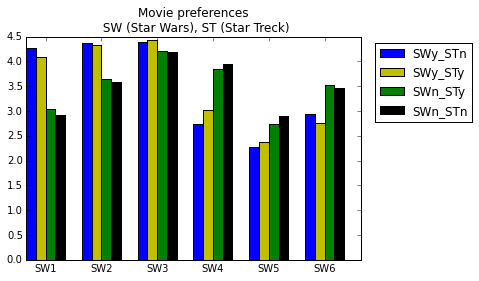

In [36]:
bars4(ls_likes[0],ls_likes[1],ls_likes[2],ls_likes[3],"Movie preferences \n SW (Star Wars), ST (Star Treck)")

This plot shows how people voted for each of th Star Wars movies, divided in different bars of their alleged fandom, for example the blue bars show the rating from fans that liked Star Wars (SWy) but didn't like Start Treck (STn).

Some conclusions:
- In general, liking ST or not doesn't influence how the fans reacted to SW. Blue and yellow behave similarly, black and green too. So what is important is to be a fan of SW or not.
- People that are fans of SW, like the first made 3 movies better... makes sense, die hard SW fans are very nostalgic for those movies, and felt dissapointed at the new renditions of the saga.
- People that are not fans of SW started liking the new movies, but their interest decreased gradually on episodes 2 and 3.